1.regression model:还需要再选一个？
2.performance用RMSE
3.给train和predict的过程注释

train score:0.2632722734397187
test score:0.21321154384192298
train MSE:(0.7594373439969914+0j)
test MSE:(0.7881847425444171+0j)


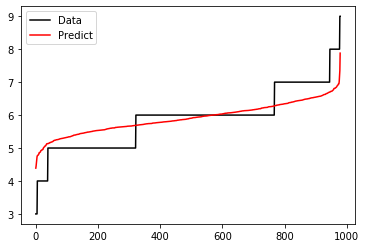

train score:0.29153766525764446
test score:0.24053495606077413
train MSE:(0.7447265287973018+0j)
test MSE:(0.7743778617318133+0j)


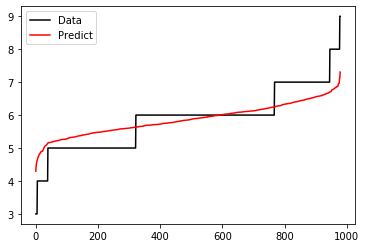

train score:0.4296836705644807
test score:0.32551332310145176
train MSE:(0.668184419871439+0j)
test MSE:(0.7297695223041927+0j)


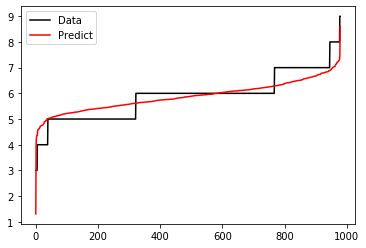

In [3]:

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import LinearSVR
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
import cmath

url_train="datasets_coursework1/Wine/wine_train.csv"
url_test="datasets_coursework1/Wine/wine_test.csv"

dataset_full=[]



def get_data(url):  
    file=open(url)
    file_lines = file.readlines()[1:]
    X_train=[]
    Y_train=[]
   
    ### ~~~~~~split data each line~~~~~~~~ ###
    for patient_line in file_lines:
        patient_linesplit=patient_line.split(";")
        #print(patient_linesplit[:5])
        vector_patient_features=np.zeros(len(patient_linesplit)-1)
        for i in range(len(patient_linesplit)-1):
            vector_patient_features[i]=float(patient_linesplit[i])
    #print(vector_patient_features)

        X_train.append(vector_patient_features)
        Y_train.append(int(patient_linesplit[-1]))
    #print(dataset_full[:5])
    return X_train,Y_train

def plot_learning_curves(model):
    #X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=10)
    train_errors, val_errors = [], []
    X_train,y_train=get_data(url_train)
    X_val,y_val=get_data(url_test)
    
    model.fit(X_train, y_train) # Train using different models
    #y_train_prediect=model.predict(X_train)
    y_test_predict = model.predict(X_val) # predict results 
    #modelscore=model.score(X_train,y_train)#评分R2为0.26
    Testscore=model.score(X_val,y_val) # compute score of model
    #modelMSE=mean_squared_error(y_train,y_train_prediect)
    TestMSE=mean_squared_error(y_val, y_test_predict) #compute MSE
    #print("train score:"+str(modelscore))
    print("test score:"+str(Testscore))
    #print("train MSE:"+str(cmath.sqrt(modelMSE)))
    print("test MSE:"+str(cmath.sqrt(TestMSE))) #print RMSE
    #plot_line(y_val,y_train_predict)画图
    #for m in range(1, len(X_train)):    # vary training set size
        #model.fit(X_train[:m], y_train[:m])           # fit the model
        #y_train_predict = model.predict(X_train[:m])  # prediction of training data
        #y_val_predict = model.predict(X_val)          # prediction of test data
        #train_errors.append(mean_squared_error(y_train[:m], y_train_predict))   # MSE on training set
        #val_errors.append(mean_squared_error(y_val, y_val_predict))             # MSE on test set
    #print(model.score(X_train,y_train))
    plot_line(y_val,y_test_predict)
    #plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train") #把train_errors画出   
    #plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")#把test_error画出
    #plt.legend(loc="upper right", fontsize=14)   
    #plt.xlabel("Training set size", fontsize=14) 
    #plt.ylabel("RMSE", fontsize=14)              
    #plt.show()                                      

def plot_line(Y_test,Y_predict):
    sorted(Y_test)
    plt.plot(range(len(Y_test)),sorted(Y_test),c="black",label="Data")
    plt.plot(range(len(Y_predict)),sorted(Y_predict),c="red",label="Predict")
    plt.legend()
    plt.show()
    
#lin_reg1 = LinearSVR(epsilon=1, random_state=42,max_iter=10000)
lin_reg1 = SVR(kernel="linear", C=3, epsilon=1.5,gamma="auto")
lin_reg2=LinearRegression()
lin_reg3= Pipeline([
                    ("poly_features", PolynomialFeatures(degree=3,interaction_only=True)), #degree上升，r^2会变成负数，degree 降低，r^2又会降低
                    ("std_scaler", StandardScaler()),
                    ("regul_reg", lin_reg2),
                ])
plot_learning_curves(lin_reg1)
plot_learning_curves(lin_reg2)
plot_learning_curves(lin_reg3)
#svm_poly_reg1 = SVR(kernel="poly", degree=2, C=100, epsilon=0.1, gamma="auto")
#plot_learning_curves(svm_poly_reg1)
#plt.axis([0, 80, 0, 3])                         # not shown in the book

###test here
#train_X,train_Y=get_data(url_train)